In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics
from keras.models import load_model

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

Using TensorFlow backend.


Criação do modelo usando 3 anos e dados booleanos

In [2]:
train070911 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_3anos\train_0711_bool.csv')
train091113 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_3anos\train_0913_bool.csv')
train111315 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_3anos\train_1115_bool.csv')

In [3]:
pred131517 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_3anos\pred_1317_bool.csv')

In [4]:
train070911_idebs = pd.DataFrame()
train091113_idebs = pd.DataFrame()
train111315_idebs = pd.DataFrame()
pred131517_idebs = pd.DataFrame()

train070911_idebs['Ideb2007'] = train070911['Ideb2007']
train070911_idebs['Ideb2009'] = train070911['Ideb2009']
train070911_idebs['Ideb2011'] = train070911['Ideb2011']

train091113_idebs['Ideb2009'] = train091113['Ideb2009']
train091113_idebs['Ideb2011'] = train091113['Ideb2011']
train091113_idebs['Ideb2013'] = train091113['Ideb2013']

train111315_idebs['Ideb2011'] = train111315['Ideb2011']
train111315_idebs['Ideb2013'] = train111315['Ideb2013']
train111315_idebs['Ideb2015'] = train111315['Ideb2015']

pred131517_idebs['Ideb2013'] = pred131517['Ideb2013']
pred131517_idebs['Ideb2015'] = pred131517['Ideb2015']
pred131517_idebs['Ideb2017'] = pred131517['Ideb2017']

In [5]:
train070911_target = train070911[['Ideb2013']]
train070911.drop(columns=['Ideb2013','Ideb2015','Ideb2017'],inplace=True)

train091113_target = train091113[['Ideb2015']]
train091113.drop(columns=['Ideb2007','Ideb2015','Ideb2017'],inplace=True)

train111315_target = train111315[['Ideb2017']]
train111315.drop(columns=['Ideb2007','Ideb2009','Ideb2017'],inplace=True)

pred131517.drop(columns=['Ideb2007','Ideb2009','Ideb2011'],inplace=True)

In [6]:
list(pred131517.columns)

['Unnamed: 0',
 'in_comum_creche0',
 'in_comum_pre0',
 'in_comum_fund_ai0',
 'in_comum_fund_af0',
 'in_comum_medio_integrado0',
 'in_comum_medio_normal0',
 'in_comum_medio_medio0',
 'in_em_atividade0',
 'in_local_func_predio_escolar0',
 'in_local_func_salas_empresa0',
 'in_local_func_socioeducativo0',
 'in_local_func_unid_prisional0',
 'in_local_func_prisional_socio0',
 'in_local_func_templo_igreja0',
 'in_local_func_casa_professor0',
 'in_local_func_salas_outra_esc0',
 'in_predio_compartilhado0',
 'in_agua_filtrada0',
 'in_agua_rede_publica0',
 'in_agua_poco_artesiano0',
 'in_agua_cacimba0',
 'in_agua_fonte_rio0',
 'in_agua_inexistente0',
 'in_energia_rede_publica0',
 'in_energia_gerador0',
 'in_energia_outros0',
 'in_energia_inexistente0',
 'in_esgoto_rede_publica0',
 'in_esgoto_fossa0',
 'in_esgoto_inexistente0',
 'in_lixo_coleta_periodica0',
 'in_lixo_queima0',
 'in_lixo_joga_outra_area0',
 'in_lixo_recicla0',
 'in_lixo_enterra0',
 'in_lixo_outros0',
 'in_sala_diretoria0',
 'in_sal

In [8]:
Cod_Escolas = pred131517['Cod_Escola_Completo']

In [10]:
train070911.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1'],inplace=True)
train091113.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1'],inplace=True)
train111315.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1'],inplace=True)

pred131517.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1'],inplace=True)

Criação do modelo 070911

In [64]:
X_train_070911, X_test_070911, y_train_070911, y_test_070911 = train_test_split(train070911,train070911_target,test_size=0.1,random_state=932)
model_070911 = Sequential()
n_cols = X_train_070911.shape[1]
model_070911.add(Dense(65,activation='relu',input_shape = (n_cols,)))
#model_070911.add(Dense(18,activation='relu',input_shape = (n_cols,)))
model_070911.add(Dense(53,activation='relu',input_shape = (n_cols,)))
model_070911.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [65]:
model_070911.compile(optimizer='adam',loss='mean_squared_error')
model_070911.fit(X_train_070911,y_train_070911,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23838 samples, validate on 5960 samples
Epoch 1/100
23838/23838 [==============================] - 3s 106us/step - loss: 0.6081 - val_loss: 0.3052
Epoch 2/100
23838/23838 [==============================] - 2s 86us/step - loss: 0.3016 - val_loss: 0.3042
Epoch 3/100
23838/23838 [==============================] - 2s 84us/step - loss: 0.2971 - val_loss: 0.3046
Epoch 4/100
23838/23838 [==============================] - 2s 86us/step - loss: 0.2962 - val_loss: 0.3036
Epoch 5/100
23838/23838 [==============================] - 2s 98us/step - loss: 0.2968 - val_loss: 0.3058
Epoch 6/100
23838/23838 [==============================] - 2s 94us/step - loss: 0.2952 - val_loss: 0.2960
Epoch 7/100
23838/23838 [==============================] - 2s 87us/step - loss: 0.2944 - val_loss: 0.2967
Epoch 8/100
23838/23838 [==============================] - 2s 90us/step - loss: 0.2931 - val_loss: 0.3199


In [66]:
model_070911.evaluate(X_test_070911,y_test_070911)

3311/3311 [==============================] - 0s 40us/step


0.32785991139370163

In [72]:
model_070911.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_070911_bool.h5')

Criação do modelo 091113

In [23]:
X_train_091113, X_test_091113, y_train_091113, y_test_091113 = train_test_split(train091113,train091113_target,test_size=0.1,random_state=932)
model_091113 = Sequential()
n_cols = X_train_091113.shape[1]
model_091113.add(Dense(45,activation='relu',input_shape = (n_cols,)))
model_091113.add(Dense(33,activation='relu',input_shape = (n_cols,)))
#model_091113.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_091113.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [24]:
model_091113.compile(optimizer='adam',loss='mean_squared_error')
model_091113.fit(X_train_091113,y_train_091113,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23838 samples, validate on 5960 samples
Epoch 1/100
23838/23838 [==============================] - 2s 87us/step - loss: 0.6301 - val_loss: 0.2867
Epoch 2/100
23838/23838 [==============================] - 2s 76us/step - loss: 0.2737 - val_loss: 0.2866
Epoch 3/100
23838/23838 [==============================] - 2s 85us/step - loss: 0.2731 - val_loss: 0.2645
Epoch 4/100
23838/23838 [==============================] - 2s 103us/step - loss: 0.2718 - val_loss: 0.2664
Epoch 5/100
23838/23838 [==============================] - 3s 118us/step - loss: 0.2669 - val_loss: 0.2628
Epoch 6/100
23838/23838 [==============================] - 2s 101us/step - loss: 0.2677 - val_loss: 0.2708
Epoch 7/100
23838/23838 [==============================] - 2s 90us/step - loss: 0.2664 - val_loss: 0.2660


In [38]:
model_091113.evaluate(X_test_091113,y_test_091113)

3311/3311 [==============================] - 0s 36us/step


0.27420509088367034

In [73]:
model_091113.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_091113_bool.h5')

Criação do modelo 111315

In [40]:
X_train_111315, X_test_111315, y_train_111315, y_test_111315 = train_test_split(train111315,train111315_target,test_size=0.1,random_state=932)
model_111315 = Sequential()
n_cols = X_train_091113.shape[1]
model_111315.add(Dense(63,activation='relu',input_shape = (n_cols,)))
model_111315.add(Dense(28,activation='relu',input_shape = (n_cols,)))
#model_111315.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_111315.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [41]:
model_111315.compile(optimizer='adam',loss='mean_squared_error')
model_111315.fit(X_train_111315,y_train_111315,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23838 samples, validate on 5960 samples
Epoch 1/100
23838/23838 [==============================] - 3s 108us/step - loss: 0.6185 - val_loss: 0.2522
Epoch 2/100
23838/23838 [==============================] - 2s 89us/step - loss: 0.2673 - val_loss: 0.2528
Epoch 3/100
23838/23838 [==============================] - 2s 80us/step - loss: 0.2647 - val_loss: 0.2458
Epoch 4/100
23838/23838 [==============================] - 2s 81us/step - loss: 0.2639 - val_loss: 0.2532
Epoch 5/100
23838/23838 [==============================] - 2s 80us/step - loss: 0.2586 - val_loss: 0.2476


In [42]:
model_111315.evaluate(X_test_111315,y_test_111315)

3311/3311 [==============================] - 0s 34us/step


0.28163332931587104

In [74]:
model_111315.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_111315_bool.h5')

In [84]:
pd.DataFrame(pred131517).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred131517_bool.csv')

Output

In [67]:
pred_070911 = pd.Series(data=model_070911.predict(pred131517)[:,0])
pred_091113 = pd.Series(data=model_091113.predict(pred131517)[:,0])
pred_111315 = pd.Series(data=model_111315.predict(pred131517)[:,0])

In [55]:
ideb2013_media = 4.827615 #train070911_target.mean()
ideb2015_media = 5.131125 #train091113_target.mean()
ideb2017_media = 5.353015 #train111315_target.mean()

In [56]:
cte = (5.353015/5.131125 + 5.131125/4.827615)/2

In [79]:
output = pd.DataFrame()
output['pred_070911_bool'] = pred_070911#(5.353015 + (pred_070911 - 4.827615))
output['pred_091113_bool'] = pred_091113#(5.353015 + (pred_091113 - 5.131125))
output['pred_111315_bool'] = pred_111315#(5.353015 + (pred_111315 - 5.353015))
output['ensemble_bool'] = ((output['pred_070911_bool']+output['pred_091113_bool']+output['pred_111315_bool'])/3)
output['Ideb2017'] = pred131517['Ideb2017'] 
output['dif'] = output['ensemble_bool'] - output['Ideb2017']
output['Cod_Escola'] = Cod_Escolas

In [69]:
output

,pred_070911,pred_091113,pred_111315,ensemble,Ideb2017,dif,Cod_Escola
0,6.749145,6.675427,6.432642,6.619071,6.4,0.494071,15039153
1,7.556427,7.450356,7.240335,7.415706,7.2,0.815706,15039153
2,6.899926,6.904713,6.716972,6.840537,6.5,1.140537,21017484
3,6.642420,6.640884,6.090891,6.458065,6.2,1.233065,12011410
4,5.496856,5.594376,5.093061,5.394764,5.7,0.494764,12011410
5,7.246018,7.409958,6.838300,7.164758,6.9,0.989758,14006111
6,7.780204,7.787037,7.281107,7.616116,7.5,1.341116,14006111
7,5.156083,5.875053,5.281757,5.437631,4.9,0.437631,15038688
8,6.053469,6.656913,6.071445,6.260609,6.0,0.910609,15038688
9,7.404503,7.400884,7.074727,7.293372,6.6,1.168372,31166545


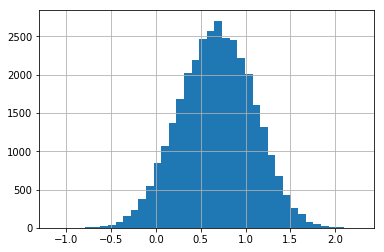

In [70]:
output['dif'].hist(bins=40)

In [85]:
output.describe()

,pred_070911_bool,pred_091113_bool,pred_111315_bool,ensemble_bool,Ideb2017,dif,Cod_Escola
count,33109.000000,33109.000000,33109.000000,33109.000000,33109.000000,33109.000000,3.310900e+04
mean,5.737023,5.696314,5.588242,5.673851,5.352974,0.320875,3.302644e+07
std,1.136040,1.040983,1.023072,1.050213,1.101314,0.272583,9.648031e+06
min,2.467809,2.510634,2.630831,2.536425,1.600000,-1.720794,1.100026e+07
25%,4.882051,4.932605,4.817370,4.886446,4.600000,0.148071,2.703266e+07
50%,5.704967,5.677128,5.522692,5.632612,5.300000,0.326595,3.304017e+07
75%,6.592048,6.451478,6.359995,6.463798,6.200000,0.497646,4.105236e+07
max,10.057154,9.655505,9.645646,9.695828,9.600000,1.868704,5.301462e+07


In [75]:
output_sort_dif = output.sort_values(['dif'],ascending=False)
output_sort_dif

,pred_070911,pred_091113,pred_111315,ensemble,Ideb2017,dif,Cod_Escola
17112,7.731064,7.272532,7.320746,7.441448,8.7,2.266448,23001232
17070,8.643002,8.549801,8.059740,8.417514,8.4,2.092514,23115025
8606,8.085672,7.656448,7.307224,7.683115,7.5,2.058115,43119956
16816,7.686040,7.602261,7.531127,7.606476,8.9,2.056476,23050403
16983,8.016886,7.750393,7.595920,7.787733,8.1,2.037733,23084766
3871,7.151244,7.412795,7.097237,7.220425,6.6,2.020425,35007043
16215,10.057154,9.655505,9.374827,9.695828,9.5,1.995828,23229284
16515,9.168993,8.497992,8.841093,8.836026,9.1,1.986026,23015438
32682,8.066601,8.007894,7.725060,7.933184,7.7,1.983184,41060261
8259,7.377862,7.370784,7.242940,7.330529,7.2,1.980529,53007743


In [81]:
best_esc_pred3 = output_sort_dif.head(1000)

In [82]:
best_esc_pred3.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\best_schools\best_esc_pred3(sem_ideb)_bool.csv')